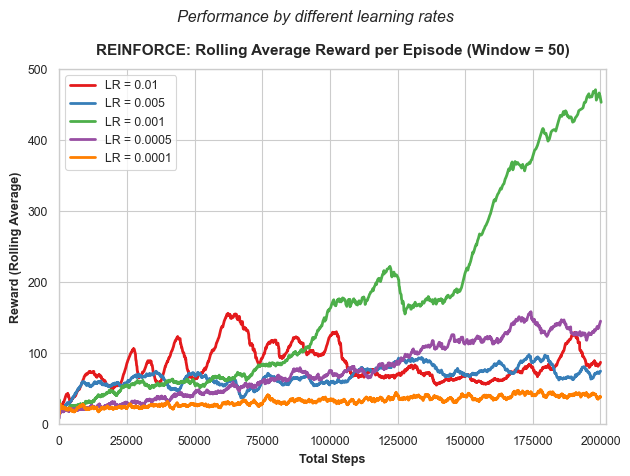

In [13]:
import os
import re
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def extract_legend(file_name):
    match = re.search(r'LR(.*?)_', file_name)
    if match:
        return match.group(1)
    else:
        return "Unknown"

def plot_data(directory, model):
    # files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    files = [f"{directory}/LR0.01_.txt", f"{directory}/LR0.005_.txt",  f"{directory}/LR0.001_.txt", f"{directory}/LR0.0005_.txt", f"{directory}/LR0.0001_.txt"]
    legends = {}
    for file_name in files:
        legend = extract_legend(file_name)
        legends[file_name] = "LR = " + legend

    for file_path, legend in legends.items():
        with open(file_path, 'r') as file:
            data = file.read()

        episodes = []
        rewards = []
        total_steps = []
        for line in data.strip().split('\n'):
            record = json.loads(line)
            episodes.append(record['episode'])
            rewards.append(record['reward'])
            total_steps.append(record['total_steps'])

        window_size = 50
        reward_series = pd.Series(rewards)
        # rolling_steps = np.convolve(total_steps, np.ones(rolling_window)/rolling_window, mode='valid')
        rolling_rewards = reward_series.rolling(window=window_size, min_periods=1).mean()
        sns.set_style("whitegrid")
        sns.set_palette("Set1")  # Example of using a different color palette
    
    # Plotting with Seaborn
        sns.lineplot(x=total_steps, y=rolling_rewards, linewidth=2, label=legend)  # Customizing line width and adding markers
        sns.set_context("paper") 
       

    plt.xlabel('Total Steps',fontdict={'fontsize': 9, 'fontweight': 'bold'})
    plt.ylabel('Reward (Rolling Average)',fontdict={'fontsize': 9, 'fontweight': 'bold'})
    plt.title(f'{model}: Rolling Average Reward per Episode (Window = {window_size})',fontdict={'fontsize': 11, 'fontweight': 'bold'}, pad=10)
    plt.suptitle("Performance by different learning rates", fontstyle="italic")
    plt.legend(loc='upper left')
    plt.xlim(0, 202000)  # Set x-axis range from 0 to 100,000
    plt.ylim(0, 500)
    plt.tight_layout()
    plt.show()

plot_data("./logs/reinforce/lr", "REINFORCE")